<a href="https://colab.research.google.com/github/abhishek116002/dmml_assignments/blob/main/assignment3/asgnmt3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
from packaging import version
import pandas as pd
import sklearn
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

assert sys.version_info >= (3, 7)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [2]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
# File path
path = 'https://github.com/abhishek116002/dmml_assignments/raw/main/assignment3/overhead_mnist_data/'
path_tr = path + 'training/'

# Save files as dataframes
X_train_full = pd.read_csv(path + 'train.csv')
X_test = pd.read_csv(path + 'test.csv')

classes = pd.read_csv(path + 'classes.csv')



In [4]:

X_train= X_train_full[:-5000]
X_valid= X_train_full[-5000:]

In [5]:
X_train.shape, X_test.shape, X_valid.shape

((63161, 785), (8529, 785), (5000, 785))

In [6]:
X_train_flat = X_train.dropna().drop('label', axis = 1)
y_train = X_train.dropna()[['label']].values.ravel()

X_test_flat = X_test.dropna().drop('label', axis = 1)
y_test = X_test.dropna()[['label']].values.ravel()

X_valid_flat = X_valid.dropna().drop('label', axis = 1)
y_valid = X_valid.dropna()[['label']].values.ravel()

In [7]:
X_train_flat, X_valid_flat, X_test_flat = X_train_flat / 255., X_valid_flat / 255., X_test_flat / 255.

In [8]:
X_train_flat.shape, y_train.shape, X_test_flat.shape, y_test.shape, X_valid_flat.shape, y_valid.shape

((63153, 784), (63153,), (8520, 784), (8520,), (4999, 784), (4999,))

0 0.99 0.46489297859571915 (63153, 608)
1 0.97 0.4512902580516103 (63153, 419)
2 0.95 0.4482896579315863 (63153, 313)
3 0.93 0.4472894578915783 (63153, 240)
4 0.91 0.4404880976195239 (63153, 186)
5 0.89 0.4342868573714743 (63153, 146)
6 0.87 0.4280856171234247 (63153, 115)
7 0.85 0.42388477695539106 (63153, 92)
8 0.83 0.4224844968993799 (63153, 74)
9 0.81 0.4206841368273655 (63153, 60)
10 0.79 0.41268253650730147 (63153, 48)
11 0.77 0.4006801360272054 (63153, 39)
12 0.75 0.39347869573914784 (63153, 32)
13 0.73 0.36667333466693336 (63153, 26)
14 0.71 0.3660732146429286 (63153, 21)


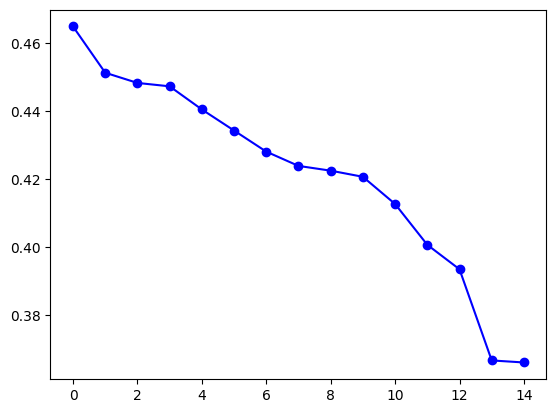

In [9]:
params = np.array(range(99, 70, -2))/100
results = []
shapes = []
for i in range(len(params)):

  pca = PCA(n_components=params[i], svd_solver = 'full')
  pca.fit(X_train_flat)
  X_train_flat_pca = pca.transform(X_train_flat)
  X_valid_flat_pca = pca.transform(X_valid_flat)
  log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
  log_reg.fit(X_train_flat_pca[:], y_train[:])
  result = log_reg.score(X_valid_flat_pca, y_valid)
  shape = X_train_flat_pca.shape
  results.append(result )
  shapes.append(shapes)
  print(i, params[i], result, shape )

plt.plot(results, 'bo-')


Want to reduce dimensions but not sacrifice accuracy by a lot. Based on this, chose parameter n_components=0.83

In [10]:
#@title Base Model


pca = PCA(n_components=0.83, svd_solver = 'full')
pca.fit(X_train_flat)
X_train_flat_pca = pca.transform(X_train_flat)
X_valid_flat_pca = pca.transform(X_valid_flat)
X_test_flat_pca = pca.transform(X_test_flat)
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_flat_pca[:], y_train[:])
log_reg.score(X_valid_flat_pca, y_valid)

0.4224844968993799

In [11]:
#@title took 50 points at random and did logistic regression on those and looked at the accuracy of the resulting model

rep_idx = np.random.randint(0,55000,50)
X_representative_digits_pca = X_train_flat_pca[rep_idx]
y_representative_digits = y_train[rep_idx]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits_pca, y_representative_digits)
log_reg.score(X_valid_flat_pca, y_valid)

0.2504500900180036

In [12]:
#@title took 100 points using kmeans clustering and did logistic regression on those and looked at the accuracy of the resulting model

k = 100
kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
X_digits_dist = kmeans.fit_transform(X_train_flat_pca)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)

X_representative_digits_pca = X_train_flat_pca[representative_digit_idx]
y_representative_digits = y_train[representative_digit_idx]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits_pca, y_representative_digits)
log_reg.score(X_valid_flat_pca, y_valid)

0.20624124824964993

did parameter tuning to find the best value of k(number of clusters) in the KMeans function. The values of k considered are approximatly 1%, 2%, 3% and 3.5% of the data.

50 0.15603120624124825---100 0.20624124824964993---200 0.2578515703140628---250 0.2684536907381476---350 0.27825565113022604---400 0.3052610522104421---450 0.3082616523304661---500 0.33366673334666935---1000 0.3716743348669734---1500 0.38667733546709343---2000 0.39907981596319264---2500 0.397879575915183---3000 0.38767753550710143---

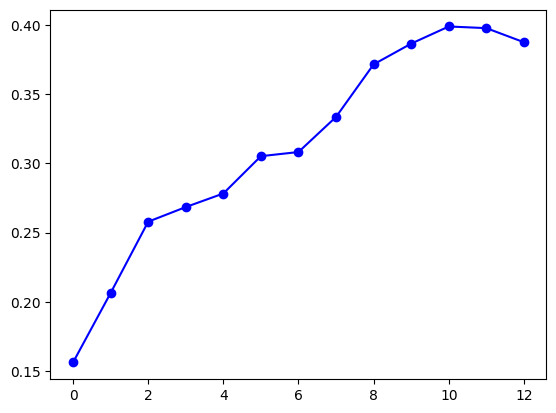

In [13]:
params = [ 50, 100, 200, 250, 350, 400, 450, 500, 1000, 1500, 2000, 2500, 3000 ]
results = []
for i in range(len(params)):
  k = params[i]

  kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
  X_digits_dist = kmeans.fit_transform(X_train_flat_pca)
  representative_digit_idx = np.argmin(X_digits_dist, axis=0)

  X_representative_digits_pca = X_train_flat_pca[representative_digit_idx]
  y_representative_digits = y_train[representative_digit_idx]

  log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
  log_reg.fit(X_representative_digits_pca, y_representative_digits)
  results.append(log_reg.score(X_valid_flat_pca, y_valid))
  print(k, results[i], end = '---')

plt.plot(results, 'bo-')



In [14]:
X_representative_digits_pca.shape

(3000, 74)

chose k=2000 clusters after doing parameter tuning. Used the 1 point each closest to each cluster. Used the resulting 1500 points to train the logistic regression model.  

In [15]:
k = 2000
kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
X_digits_dist = kmeans.fit_transform(X_train_flat_pca)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)

X_representative_digits_pca = X_train_flat_pca[representative_digit_idx]
y_representative_digits = y_train[representative_digit_idx]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits_pca, y_representative_digits)
log_reg.score(X_test_flat_pca, y_test)

0.38497652582159625

Gave ALL points in a cluster the label of the point closest to the centroid of that cluster. Then used the propagated y values to train a logistic regression.

In [16]:
y_train_propagated = np.empty(len(X_train_flat_pca), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_flat_pca, y_train_propagated)
log_reg.score(X_test_flat_pca, y_test)

0.3484741784037559

tried to propagate the y labels only to percentile% of the points in each cluster(chosen by their distance from centroid of cluster, less distance more preferred). Then used the points that have propagated labels to train a logistic regression.
tried different values of percentile.

2 0.37727545509101823----5 0.37247449489897977----10 0.3760752150430086----20 0.3716743348669734----40 0.3670734146829366----60 0.3640728145629126----90 0.35647129425885177----

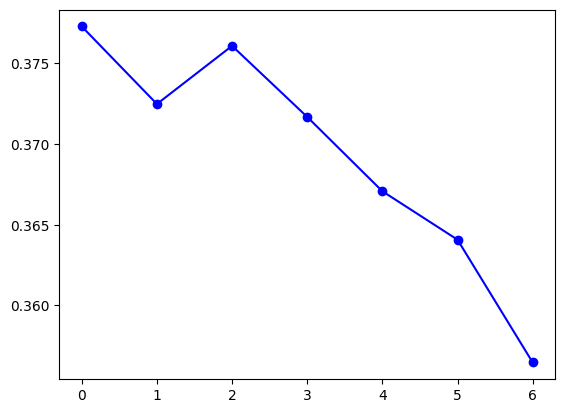

In [17]:
percentiles = [2,5,10,20,40,60, 90]
results1 = []
for i in range(len(percentiles)):
  percentile = percentiles[i]
  X_cluster_dist = X_digits_dist[:,0]
  n = len(X_cluster_dist)
  for i in range(n):
    X_cluster_dist[i] = X_digits_dist[i, kmeans.labels_[i]]



  for i in range(k):
      in_cluster = (kmeans.labels_ == i)
      cluster_dist = X_cluster_dist[in_cluster]
      cutoff_distance = np.percentile(cluster_dist, percentile)
      above_cutoff = (X_cluster_dist > cutoff_distance)
      X_cluster_dist[in_cluster & above_cutoff] = -1

  partially_propagated = (X_cluster_dist != -1)
  X_train_flat_pca_partially_propagated = X_train_flat_pca[partially_propagated]
  y_train_partially_propagated = y_train_propagated[partially_propagated]

  log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
  log_reg.fit(X_train_flat_pca_partially_propagated, y_train_partially_propagated)
  result = log_reg.score(X_valid_flat_pca, y_valid)
  results1.append(result)
  print(percentile, result, end = '----')

plt.plot(results1, 'bo-')


chose percentile=30 by parameter tuning in previous code block.

In [19]:
percentile = 1.5
X_cluster_dist = X_digits_dist[:,0]
n = len(X_cluster_dist)
for i in range(n):
  X_cluster_dist[i] = X_digits_dist[i, kmeans.labels_[i]]



for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_flat_pca_partially_propagated = X_train_flat_pca[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_flat_pca_partially_propagated, y_train_partially_propagated)
result = log_reg.score(X_test_flat_pca, y_test)
result

0.36807511737089205